In [16]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
""" Importing Data """
#path kısmı değiştirilmeli
data_set = pd.read_csv('D:\\CE\\4x1\\Veri Madenciliği\\proje\\dataR2.csv')
data_set = data_set.iloc[1:]
data_set = data_set.astype(float)
data_set.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
1,83.0,20.690495,92.0,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1.0
2,82.0,23.124670,91.0,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1.0
3,68.0,21.367521,77.0,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1.0
4,86.0,21.111111,92.0,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1.0
5,49.0,22.854458,92.0,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1.0


In [17]:
print(data_set.describe())

              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  115.000000  115.000000  115.000000  115.000000  115.000000  115.000000   
mean    57.382609   27.617607   98.034783   10.075609    2.714358   26.769932   
std     16.159611    5.027463   22.472178   10.088453    3.651976   19.194292   
min     24.000000   18.370000   60.000000    2.432000    0.507936    4.311000   
25%     45.000000   22.946410   86.000000    4.370000    0.940996   12.390500   
50%     57.000000   27.688778   92.000000    6.030000    1.383997   20.450000   
75%     71.000000   31.244295  102.000000   11.429500    2.862456   37.533200   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   115.000000  115.000000   115.000000      115.000000  
mean     10.185035   14.784489   535.669026        1.556522  
std       6.873143   12.428760   347.250560        0.498969  
min       1.656020    

In [66]:
data_set.isna()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
111,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False


In [67]:
print(data_set.isna().sum())

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


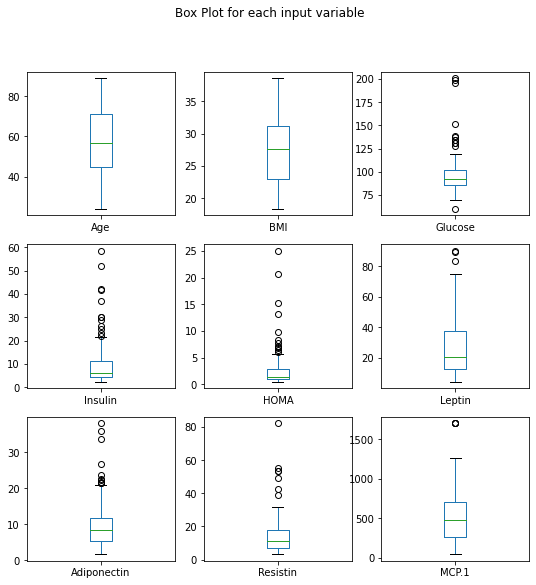

In [18]:
data_set.drop('Classification', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('attr_boxplot')
plt.show()

In [19]:
Q1 = data_set.drop('Classification', axis=1).quantile(0.25)
Q3 = data_set.drop('Classification', axis=1).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age             26.000000
BMI              8.297885
Glucose         16.000000
Insulin          7.059500
HOMA             1.921459
Leptin          25.142700
Adiponectin      6.373585
Resistin        11.084210
MCP.1          431.566500
dtype: float64


In [133]:
print("Dataset shapes before outlier detection : ", data_set.shape)
data_set_out = data_set[~((data_set.drop('Classification', axis=1) < (Q1 - 1.5 * IQR)) |(data_set.drop('Classification', axis=1) > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Dataset shapes after outlier detection : ", data_set_out.shape)

Dataset shapes before outlier detection :  (115, 10)
Dataset shapes after outlier detection :  (79, 10)


In [22]:
print(data_set_out.groupby('Classification').size())

Classification
1.0    42
2.0    37
dtype: int64


c:\users\bbuke\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


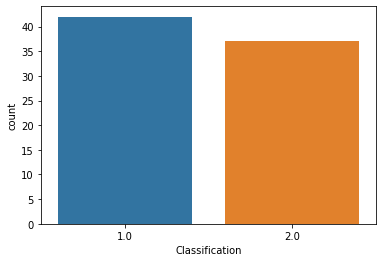

In [23]:
import seaborn as sns
sns.countplot(data_set_out['Classification'],label="Count")
plt.savefig('class_hist')
plt.show()

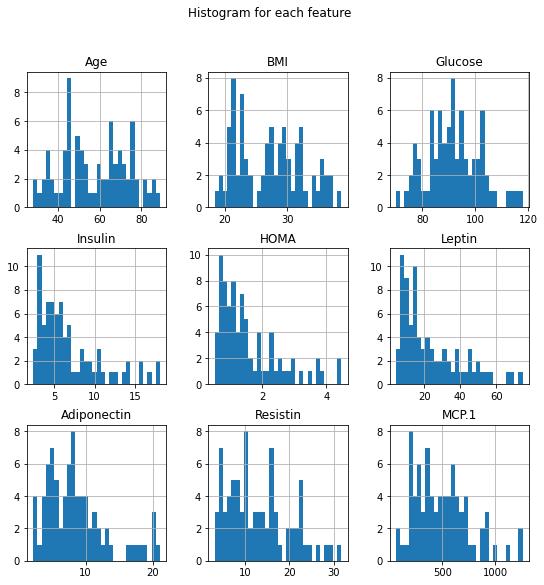

In [134]:
import pylab as pl
data_set_out.drop('Classification' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each feature")
plt.savefig('data_hist')
plt.show()

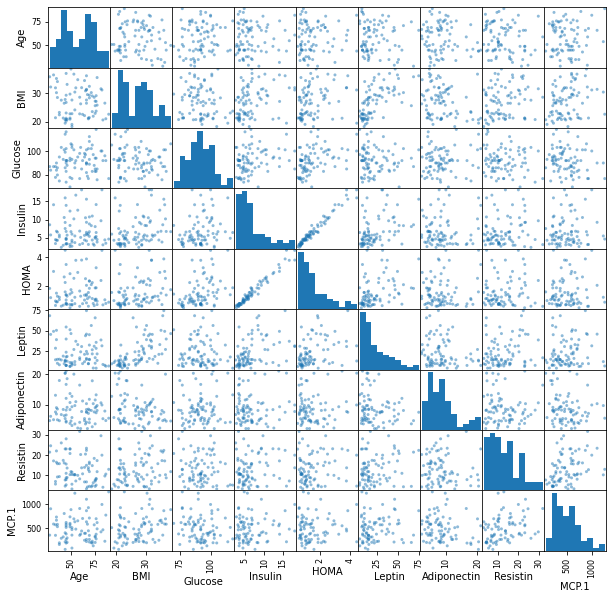

In [136]:
pd.plotting.scatter_matrix(data_set_out.drop('Classification', axis=1), figsize=(10, 10))
plt.show()

In [137]:
feature_names = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
X = data_set_out[feature_names]
y = data_set_out['Classification']

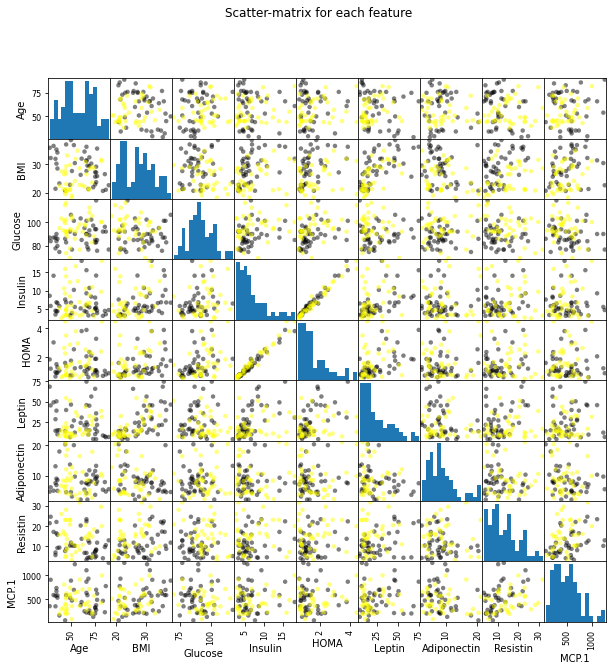

In [139]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=20, hist_kwds={'bins':15}, figsize=(10,10), cmap = cmap)
plt.suptitle('Scatter-matrix for each feature')
plt.savefig('data_scatter_matrix')

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.71


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  1]
 [ 6  7]]
              precision    recall  f1-score   support

         1.0       0.62      0.91      0.74        11
         2.0       0.88      0.54      0.67        13

    accuracy                           0.71        24
   macro avg       0.75      0.72      0.70        24
weighted avg       0.76      0.71      0.70        24



In [53]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[8 3]
 [5 8]]
              precision    recall  f1-score   support

         1.0       0.62      0.73      0.67        11
         2.0       0.73      0.62      0.67        13

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.68      0.67      0.67        24



In [143]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier(max depth) on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(max depth) on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier(max depth) on training set: 0.84
Accuracy of Decision Tree classifier(max depth) on test set: 0.67


In [144]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[9 2]
 [6 7]]
              precision    recall  f1-score   support

         1.0       0.60      0.82      0.69        11
         2.0       0.78      0.54      0.64        13

    accuracy                           0.67        24
   macro avg       0.69      0.68      0.66        24
weighted avg       0.70      0.67      0.66        24



In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.71


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[9 2]
 [5 8]]
              precision    recall  f1-score   support

         1.0       0.64      0.82      0.72        11
         2.0       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24



In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.87
Accuracy of LDA classifier on test set: 0.62


In [146]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[8 3]
 [6 7]]
              precision    recall  f1-score   support

         1.0       0.57      0.73      0.64        11
         2.0       0.70      0.54      0.61        13

    accuracy                           0.62        24
   macro avg       0.64      0.63      0.62        24
weighted avg       0.64      0.62      0.62        24



In [147]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.84
Accuracy of GNB classifier on test set: 0.71


In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[9 2]
 [5 8]]
              precision    recall  f1-score   support

         1.0       0.64      0.82      0.72        11
         2.0       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24



In [149]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.93
Accuracy of SVM classifier on test set: 0.71


In [150]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[9 2]
 [5 8]]
              precision    recall  f1-score   support

         1.0       0.64      0.82      0.72        11
         2.0       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24



In [151]:
from sklearn.cluster import KMeans
from sklearn import metrics

km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 1000, random_state = 0, n_init = 30)
km.fit(X)
X_predict = km.fit_predict(X)
c1_0 = 0
c2_0 = 0
c1_1 = 0
c2_1 = 0
for i in range(0, X_predict.shape[0]):
    if(X_predict[i] == 0):
        if(y.values[i] == 1.0):
            c1_0 = c1_0 + 1
        else:
            c2_0 = c2_0 + 1
    else:
        if(y.values[i] == 1.0):
            c1_1 = c1_1 + 1
        else:
            c2_1 = c2_1 + 1
if(c1_0 > c2_0):
    for i in range(0, X_predict.shape[0]):
        if(X_predict[i] == 0):
            X_predict[i] = 1
        else:
            X_predict[i] = 2
else:
    for i in range(0, X_predict.shape[0]):
        if(X_predict[i] == 0):
            X_predict[i] = 2
        else:
            X_predict[i] = 1
from sklearn.metrics.cluster import contingency_matrix       
cntg_matrix = contingency_matrix(y, X_predict)

print("Contingency Matrix:")
print (cntg_matrix)

Contingency Matrix:
[[21 21]
 [13 24]]
